In [32]:
import numpy as npy
import pandas as pds
import matplotlib.pyplot as mplt
import seaborn as sbn
import scipy.stats as stats

%matplotlib inline

train_data = pds.read_csv('trainDataSMOTE.csv')
train_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,56.0,1.0,1.0,19.0,0.0,0.0,0.0,0.0,201.9,134.6,88.2,27.0,75.0,73.5,1.0
1,0.0,49.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,283.0,127.0,86.0,23.7,95.0,78.0,0.0
2,0.0,63.0,2.0,1.0,3.0,0.0,0.0,1.0,0.0,246.0,163.0,82.0,24.4,64.0,108.0,0.0
3,1.0,38.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,225.0,125.0,79.0,26.2,70.0,74.0,0.0
4,0.0,42.0,2.0,1.0,18.0,0.0,0.0,0.0,0.0,218.0,123.9,71.6,23.0,80.0,66.6,1.0


In [33]:
duplicate_data = train_data[train_data.duplicated()]
duplicate_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [34]:
print(train_data.shape)
train_data.isna().sum()

(5668, 16)


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212747610C8>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

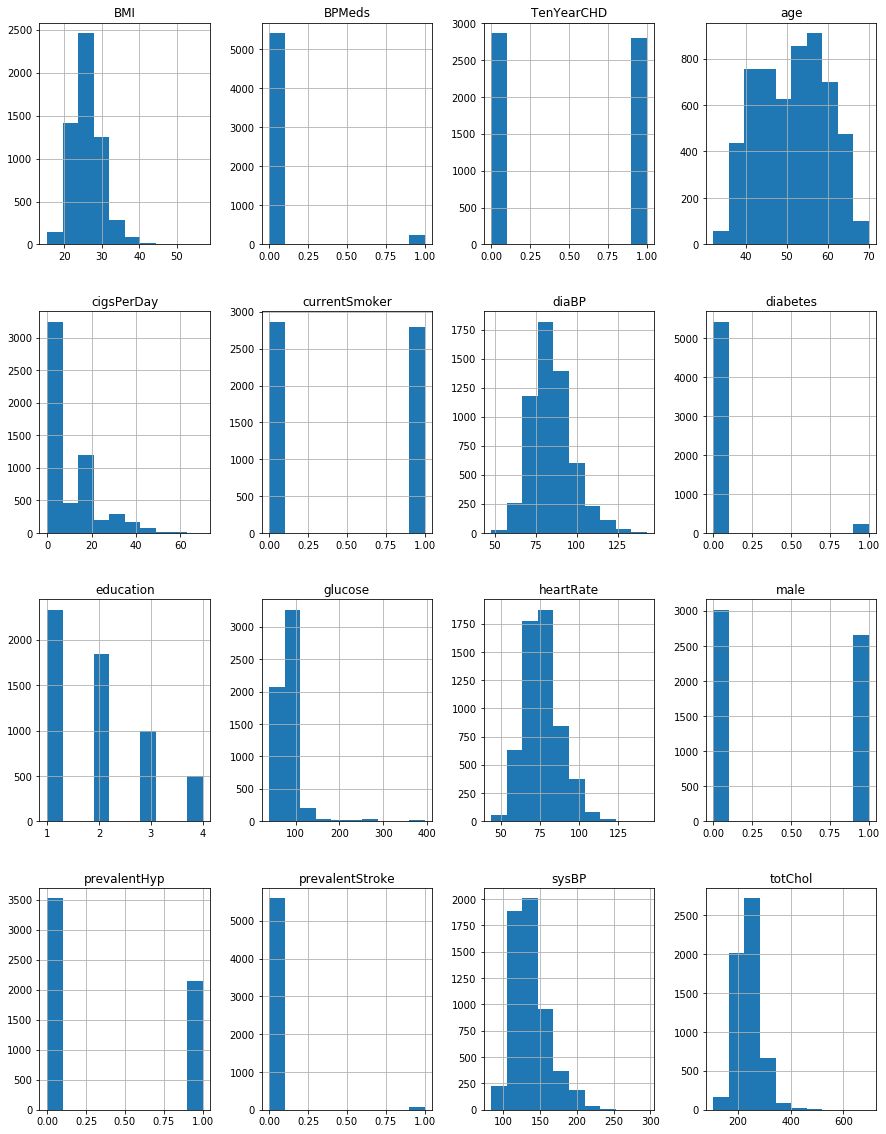

In [35]:
mplt.cla()
mplt.clf()
figure = mplt.figure(figsize = (15,20))
axes = figure.gca()
train_data.hist(ax = axes)
#mplt.savefig('histimg.png')

<Figure size 432x288 with 0 Axes>

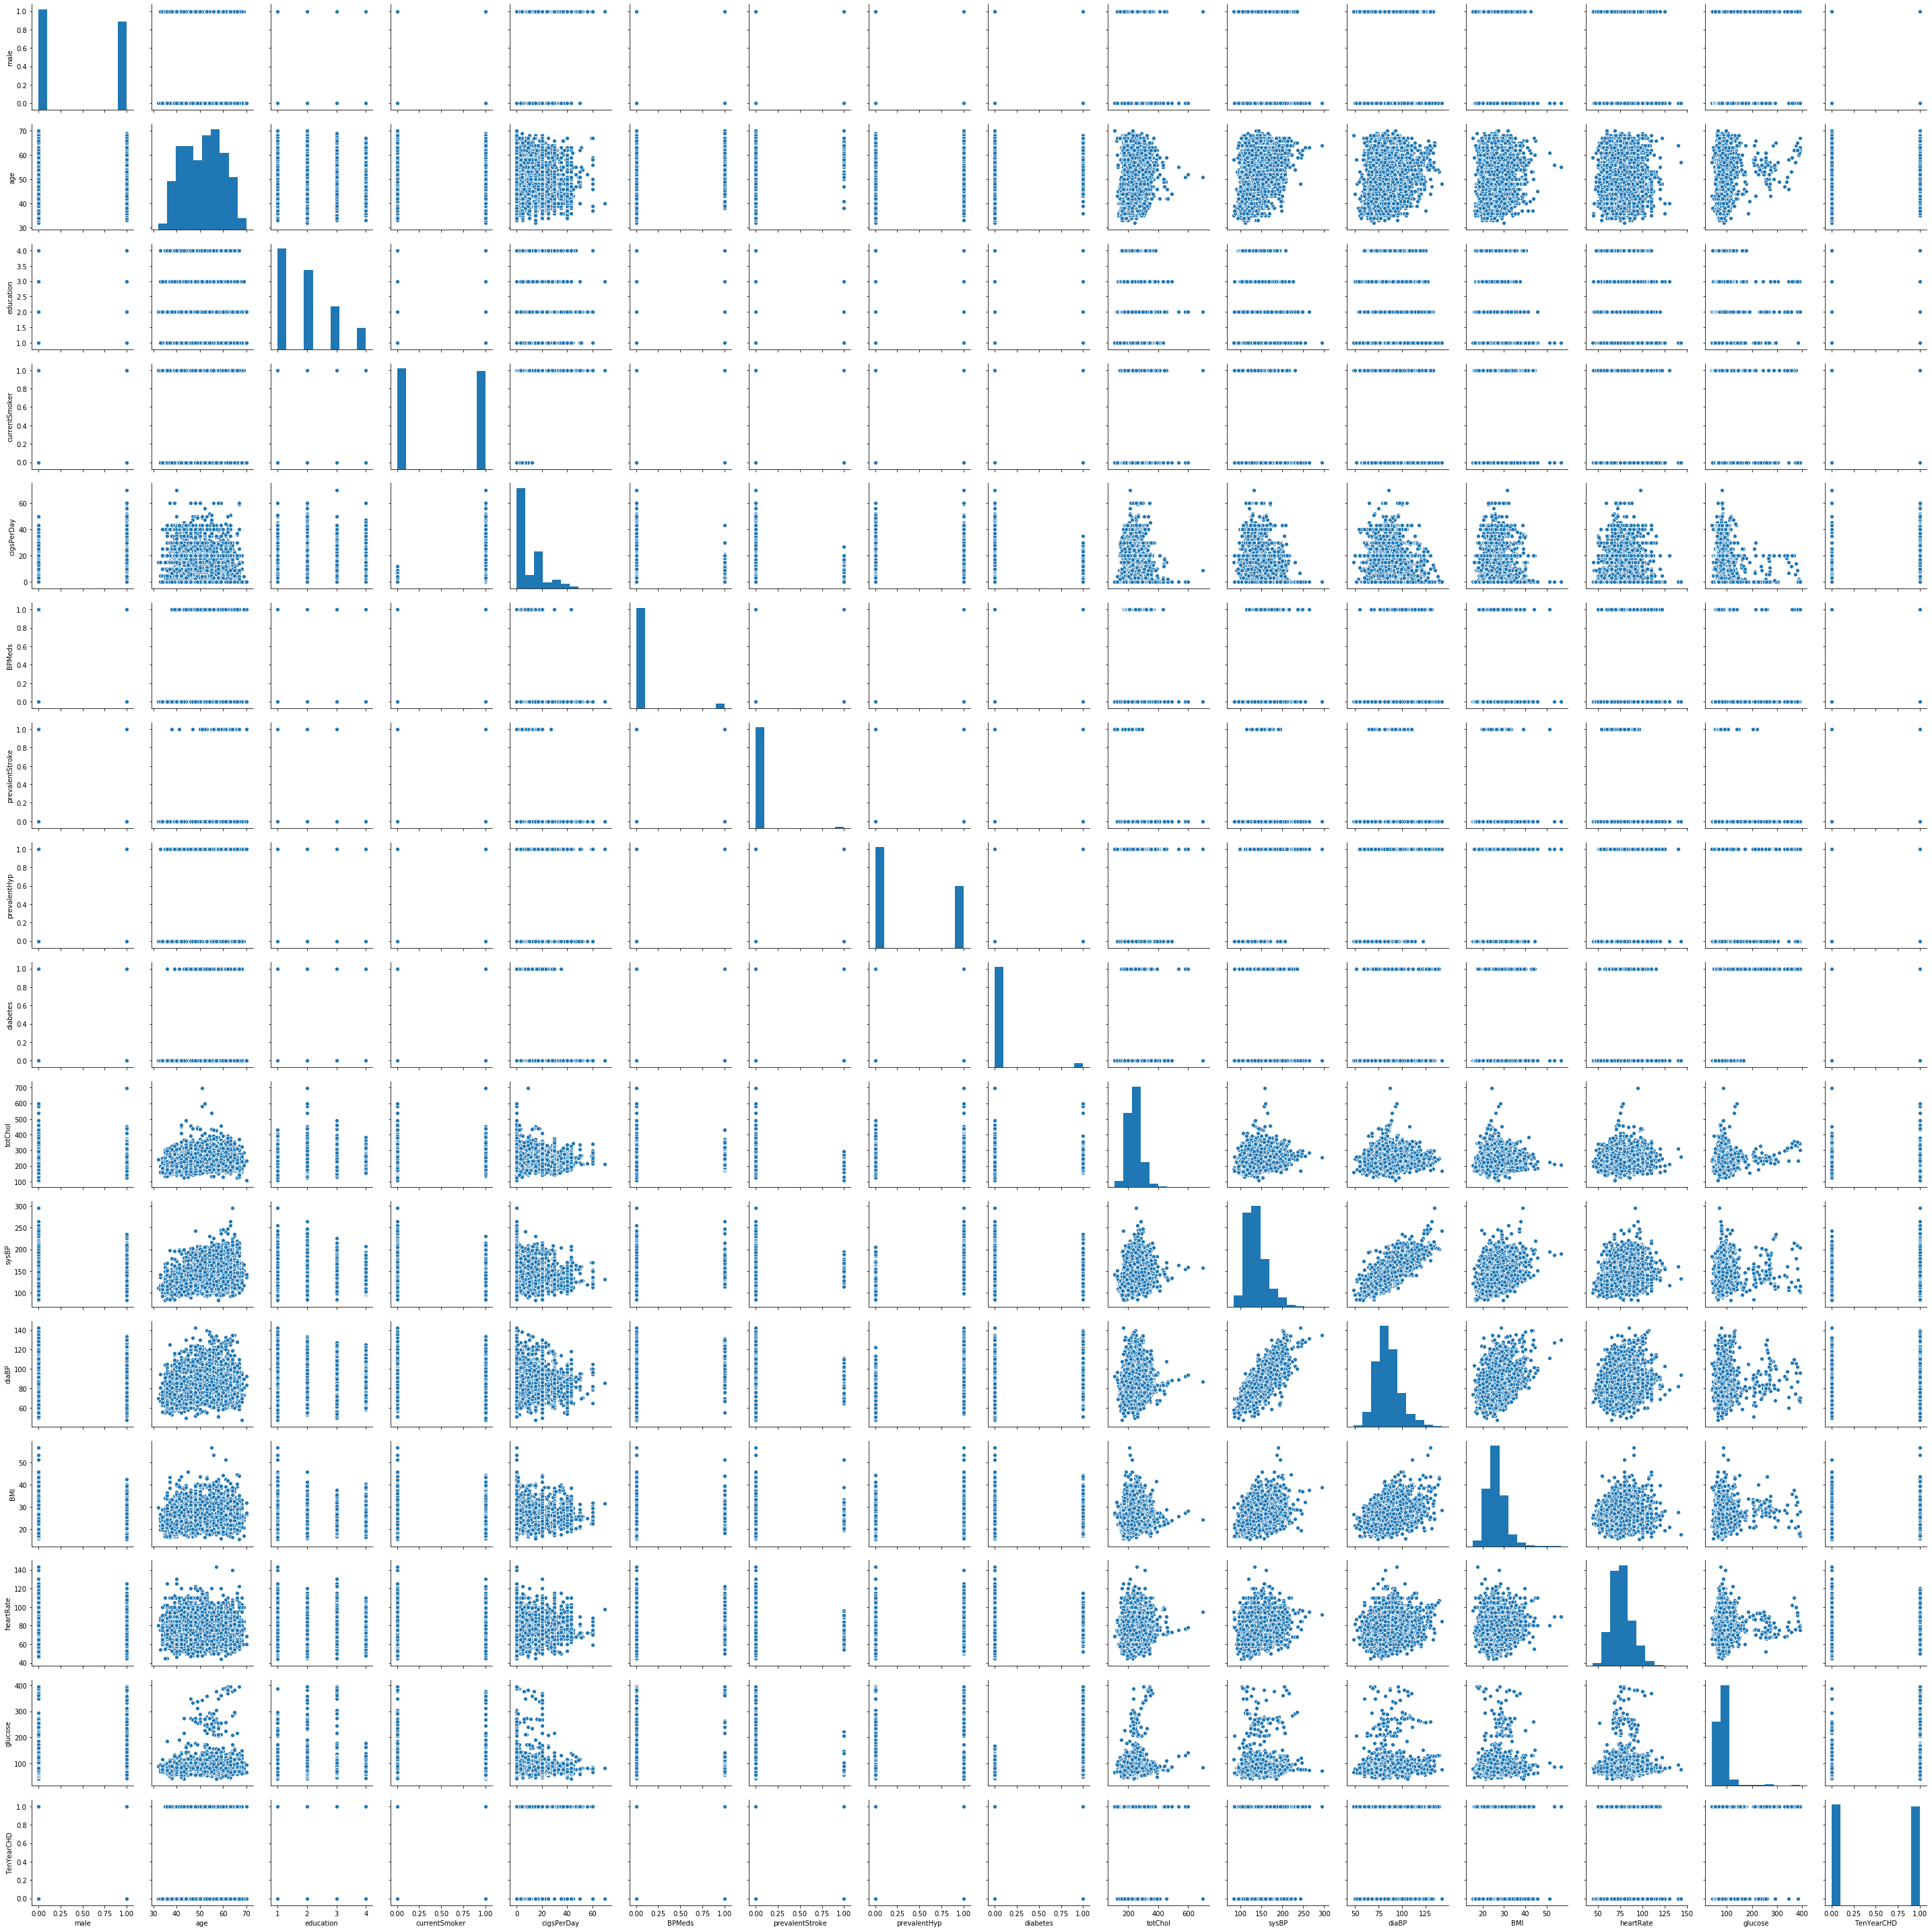

In [36]:
mplt.cla()
mplt.clf()
sbn.pairplot(train_data)

In [37]:
train_data2 = train_data[['sysBP', 'glucose', 'age', 'totChol', 'male', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'cigsPerDay', 'TenYearCHD']]
train_data2.head()

,sysBP,glucose,age,totChol,male,diaBP,prevalentHyp,diabetes,BPMeds,cigsPerDay,TenYearCHD
0,134.6,73.5,56.0,201.9,1.0,88.2,0.0,0.0,0.0,19.0,1.0
1,127.0,78.0,49.0,283.0,0.0,86.0,0.0,0.0,0.0,20.0,0.0
2,163.0,108.0,63.0,246.0,0.0,82.0,1.0,0.0,0.0,3.0,0.0
3,125.0,74.0,38.0,225.0,1.0,79.0,0.0,0.0,0.0,20.0,0.0
4,123.9,66.6,42.0,218.0,0.0,71.6,0.0,0.0,0.0,18.0,1.0


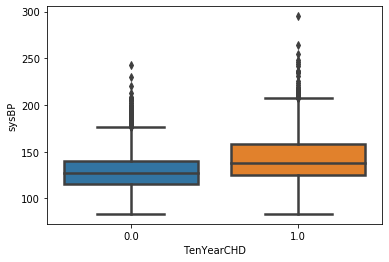

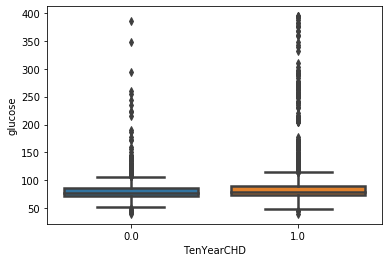

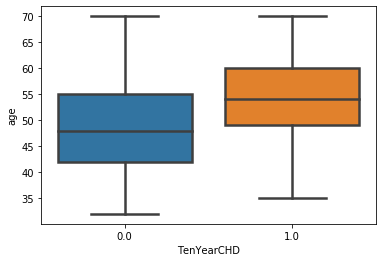

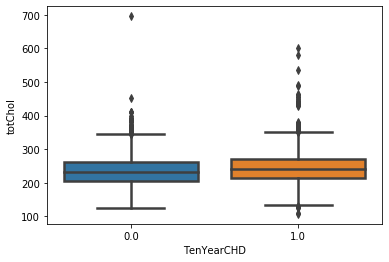

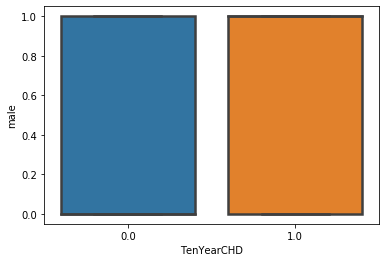

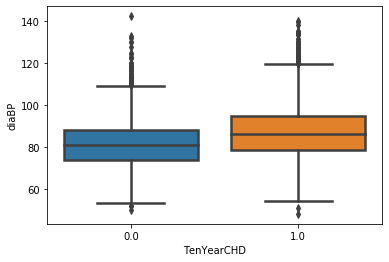

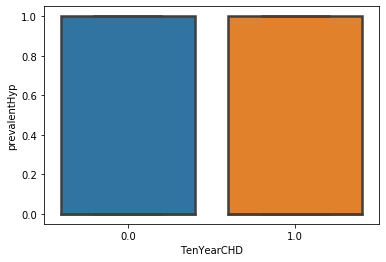

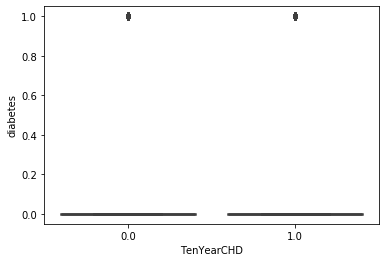

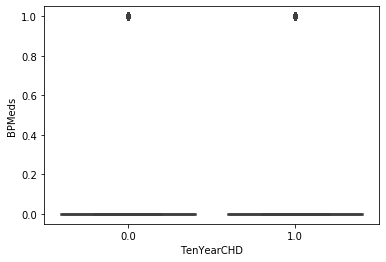

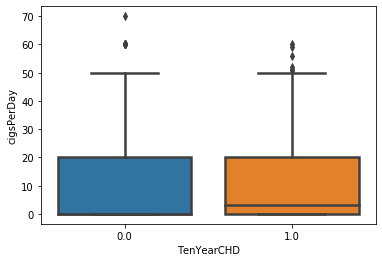

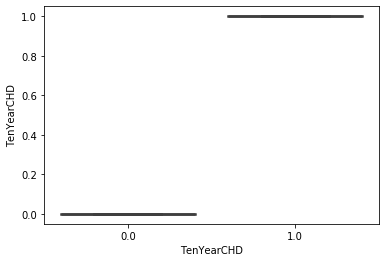

In [38]:
mplt.cla()
mplt.clf()
for y in train_data2.columns:
    sbn.boxplot(x = 'TenYearCHD', y = y, data = train_data2, linewidth = 2.5)
    #mplt.savefig('EMG {0}.png'.format(y))
    mplt.show()

In [39]:
train_data2[(train_data2.sysBP>180)]
train_data2 = train_data2[(train_data2.sysBP<=180)]

In [40]:
train_data2[(train_data2.glucose<54)]
train_data2[(train_data2.glucose>115)]
train_data2 = train_data2[(train_data2.glucose>54) & (train_data2.glucose<=115)]

In [41]:
train_data2[(train_data2.totChol>355)]
train_data2 = train_data2[train_data2.totChol<355]

In [42]:
train_data2[(train_data2.diaBP<55)]
train_data2 = train_data2[(train_data2.diaBP>55) & (train_data2.diaBP<=110)]

In [43]:
train_data2[(train_data2.cigsPerDay>50)]
train_data2 = train_data2[(train_data2.cigsPerDay<=50)]

In [44]:
train_data2.reset_index(inplace=True, drop=True)
train_data2

,sysBP,glucose,age,totChol,male,diaBP,prevalentHyp,diabetes,BPMeds,cigsPerDay,TenYearCHD
0,134.6,73.5,56.0,201.9,1.0,88.2,0.0,0.0,0.0,19.0,1.0
1,127.0,78.0,49.0,283.0,0.0,86.0,0.0,0.0,0.0,20.0,0.0
2,163.0,108.0,63.0,246.0,0.0,82.0,1.0,0.0,0.0,3.0,0.0
3,125.0,74.0,38.0,225.0,1.0,79.0,0.0,0.0,0.0,20.0,0.0
4,123.9,66.6,42.0,218.0,0.0,71.6,0.0,0.0,0.0,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4903,125.0,84.0,40.0,304.0,1.0,86.0,0.0,0.0,0.0,10.0,0.0
4904,132.0,81.9,54.0,293.0,0.0,84.0,1.0,0.0,0.0,0.0,0.0
4905,127.5,90.0,38.0,224.0,1.0,81.0,0.0,0.0,0.0,0.0,0.0
4906,132.5,80.0,47.0,252.0,0.0,85.0,0.0,0.0,0.0,43.0,0.0


In [47]:
from collections import Counter
counts = Counter(train_data2.TenYearCHD)
counts

Counter({1.0: 2261, 0.0: 2647})

In [48]:
from sklearn.utils import shuffle
train_data2 = shuffle(train_data2)

In [49]:
test_data = pds.read_csv('testData.csv')

In [50]:
#npy.savetxt('preprocessData.csv', train_data2, delimiter=',', fmt='%0.1f', newline='\n')

In [51]:
test_data = pds.read_csv('preprocessData.csv')

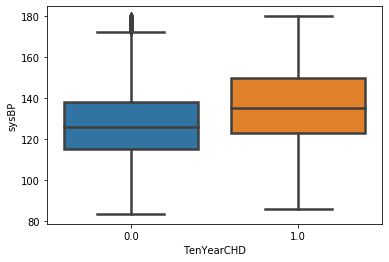

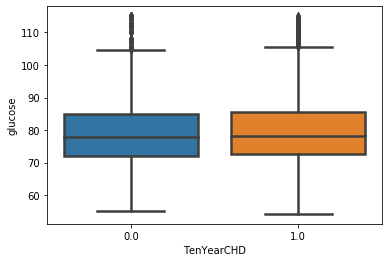

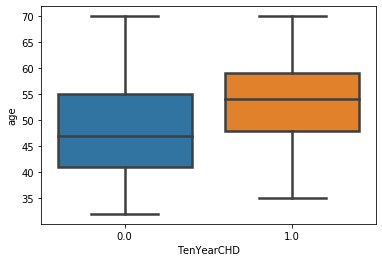

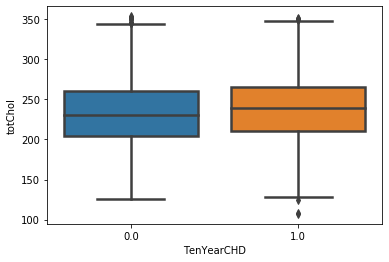

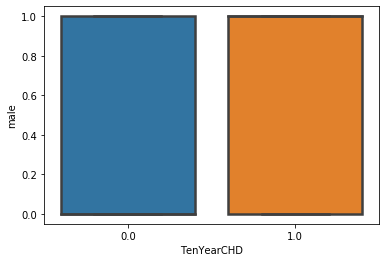

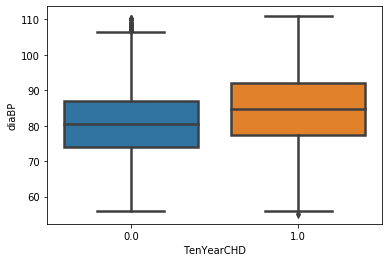

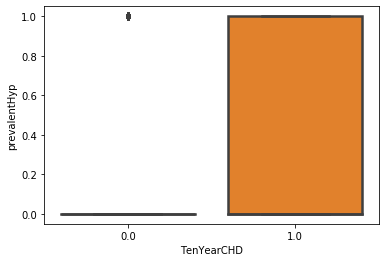

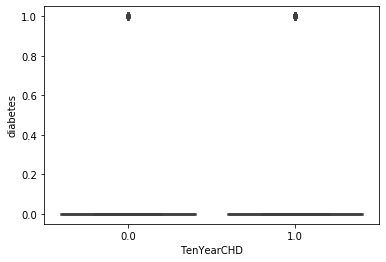

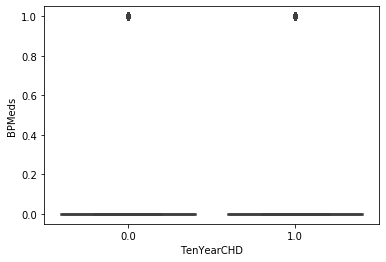

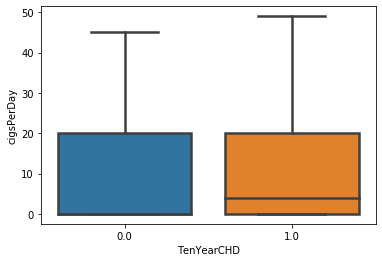

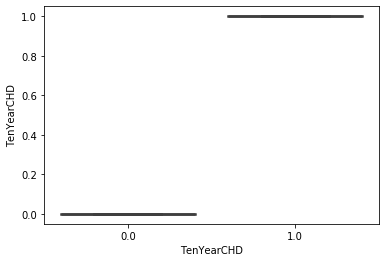

In [52]:
mplt.cla()
mplt.clf()
for y in test_data.columns:
    sbn.boxplot(x = 'TenYearCHD', y = y, data = test_data, linewidth = 2.5)
    #mplt.savefig('EMG {0}.png'.format(y))
    mplt.show()

In [53]:
test_data.shape

(4906, 11)